In [5]:
#Installing required libraries

#pip install opencv-python ----#used for image processing
#pip install PyWavelets

In [1]:
#Importing required libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
#Reading an image
image = cv2.imread('F:/ML Project/Image classification/Datasets/RDJ 2/RDJ_1.jpg')
image.shape

#we see that its displayed in RGB format

(900, 600, 3)

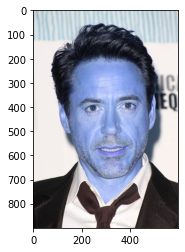

In [3]:
#plotting this image
plt.imshow(image)

In [4]:
#changing the image to gray
gray_image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image.shape

(900, 600)

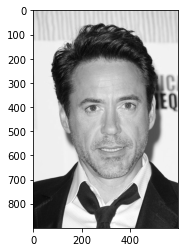

In [5]:
#plotting the gray image
plt.imshow(gray_image, cmap='gray')

# Now we detect the face using haar-cascade

In [6]:
face_cascade = cv2.CascadeClassifier('F:/ML Project/Image classification/opencv files/haarcascade_frontalface_default.xml')

face = face_cascade.detectMultiScale(gray_image, 1.3, 5)
face

array([[110, 231, 408, 408]])

In [7]:
#x - X axis
#y- Y axis
#w - Width
#h- Height

#storing the face in (x,y,w,h)
(x,y,w,h) = face[0]
(x,y,w,h)

(110, 231, 408, 408)

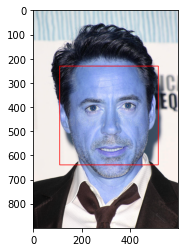

In [8]:
#highlighting that face using a rectangle

face_image = cv2.rectangle(image,(x,y),(x+w,y+h),(500,0,0),2)
plt.imshow(face_image)

We see that the face has been detected correctly adn is highlighted properly

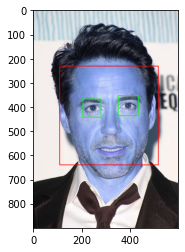

In [9]:
#Now we detect the eyes

eye_cascade = cv2.CascadeClassifier('F:/ML Project/Image classification/opencv files/haarcascade_eye.xml')

cv2.destroyAllWindows()
for (x,y,w,h) in face:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(500,0,0),2)
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,500,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

We see that the eyes have been detected properly and highlghted in green

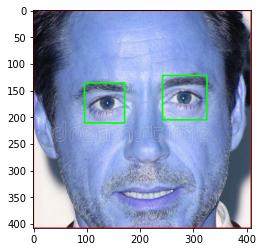

In [10]:
#plotting the cropped face with highlighted eye region
plt.imshow(roi_color, cmap='gray')

In [11]:
#now we create a fuction that take the original image as input and returns the cropped image as output
#then we can run a for loop for all the other images

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

It first takes the image then converts it to gray and detect the faces in it.Then the for loop goes through all the faces and detects the eyes 

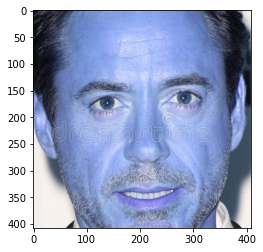

In [12]:
cropped_image = get_cropped_image_if_2_eyes('F:/ML Project/Image classification/Datasets/RDJ 2/RDJ_1.jpg')
plt.imshow(cropped_image)

In [13]:
#Now we create a "cropped" folder and store all our cropped images in that

path_to_data = "F:/ML Project/Image classification/Datasets/"
path_to_cropped_data = "F:/ML Project/Image classification/Datasets/cropped/"

In [14]:
import os  #used to interact with file system

#img_dirs = []
#for entry in os.scandir(path_to_data):     #here it will go through all the subdirectories in my dataset folder
#    if entry.is_dir():
#        img_dirs.append(entry.path)      #names of those directories will be stored in image_dirs

In [15]:
img_dirs = ['F:/ML Project/Image classification/Datasets/chris evans photoshoot - Google Search',
             'F:/ML Project/Image classification/Datasets/RDJ 2',
             'F:/ML Project/Image classification/Datasets/tom holland']
img_dirs

['F:/ML Project/Image classification/Datasets/chris evans photoshoot - Google Search',
 'F:/ML Project/Image classification/Datasets/RDJ 2',
 'F:/ML Project/Image classification/Datasets/tom holland']

In [16]:
#Creating a "cropped" folder if it does not exist

import shutil
if os.path.exists(path_to_cropped_data):
     shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [17]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    


chris evans photoshoot - Google Search
Generating cropped images in folder:  F:/ML Project/Image classification/Datasets/cropped/chris evans photoshoot - Google Search
RDJ 2
Generating cropped images in folder:  F:/ML Project/Image classification/Datasets/cropped/RDJ 2
tom holland
Generating cropped images in folder:  F:/ML Project/Image classification/Datasets/cropped/tom holland


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


We see that the images have been generated into the "cropped" folder

# PreProcessing

# Wavelet Transform

Wavelet transform is used to extract features in an image like eyes, nose, lips etc in a way that the computer understands

In [18]:
import pywt

In [19]:
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


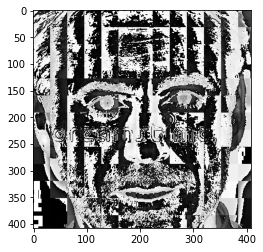

In [20]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')


In the above image we can see that there are clues on facial features like eyes, nose, etc.
For our model we will use this image and the raw image as an input. We will do a vertical stacking of these two images

In [21]:
celebrity_file_names_dict

{'chris evans photoshoot - Google Search': ['F:/ML Project/Image classification/Datasets/cropped/chris evans photoshoot - Google Search/chris evans photoshoot - Google Search1.png',
  'F:/ML Project/Image classification/Datasets/cropped/chris evans photoshoot - Google Search/chris evans photoshoot - Google Search2.png',
  'F:/ML Project/Image classification/Datasets/cropped/chris evans photoshoot - Google Search/chris evans photoshoot - Google Search3.png',
  'F:/ML Project/Image classification/Datasets/cropped/chris evans photoshoot - Google Search/chris evans photoshoot - Google Search4.png',
  'F:/ML Project/Image classification/Datasets/cropped/chris evans photoshoot - Google Search/chris evans photoshoot - Google Search5.png',
  'F:/ML Project/Image classification/Datasets/cropped/chris evans photoshoot - Google Search/chris evans photoshoot - Google Search6.png',
  'F:/ML Project/Image classification/Datasets/cropped/chris evans photoshoot - Google Search/chris evans photoshoot -

In [22]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'chris evans photoshoot - Google Search': 0, 'RDJ 2': 1, 'tom holland': 2}

# We can use the images in the cropped folder for model training. We will use the raw image and the wavelet transformed image to train our model

In [35]:
#now we iterate through this dictionary to convert everything into wavelet transformed image

X = []
y = []


for celebrity_name, training_files in celebrity_file_names_dict.items():   #iterating through the dictionaries
    for training_image in training_files:
        img = cv2.imread(training_image)  #reading an image file
        scalled_raw_img = cv2.resize(img, (32, 32))   #scaling the images since they are in different shapes and size
        img_har = w2d(img,'db1',5)  #creating wavelet transforme image
        scalled_img_har = cv2.resize(img_har, (32, 32))   #scaling the wavelet transformed image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))   #vertically stacking the raw and wavelet transformed image using a numpy function called vstack
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     


In [36]:
len(X)   #number of images in all three folders combined

71

In [37]:
len(y)  #number of wavelet transformed images

71

In [52]:
#converting to float
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(71, 4096)

# Building the model

In [53]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import seaborn as sns

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6666666666666666

In [55]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       1.00      0.43      0.60         7
           2       0.83      0.71      0.77         7

    accuracy                           0.67        18
   macro avg       0.76      0.71      0.66        18
weighted avg       0.81      0.67      0.67        18



In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [58]:
#running the gridsearchcv

scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.754545,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.525455,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.660000,{'logisticregression__C': 1}


In [59]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [60]:
best_estimators['svm'].score(X_test,y_test)

0.8888888888888888

In [61]:
best_estimators['random_forest'].score(X_test,y_test)

0.7777777777777778

In [62]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9444444444444444

In [63]:
#storing svm model in best classifier 
best_clf = best_estimators['svm']

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[4, 0, 0],
       [1, 6, 0],
       [1, 0, 6]], dtype=int64)

Text(69.0, 0.5, 'Truth')

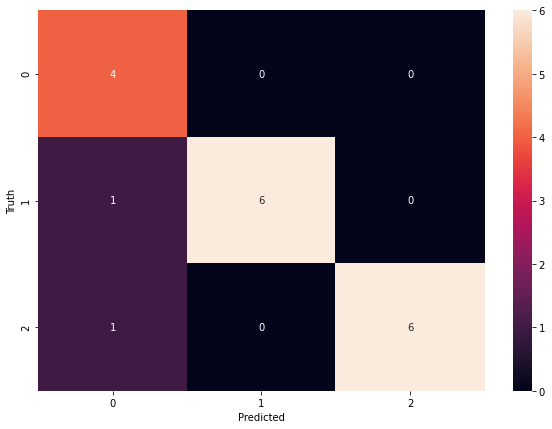

In [66]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


# Saving the model

In [67]:
import joblib

In [68]:
joblib.dump(best_clf, 'svm model.pkl')

['svm model.pkl']